# The topic of my project is visualizing the fate of Sun-like stars in M31 (or M33) throughout the course of the merger

# Question I'm answering: How can I center a visualization of the merger on the Milky Way and pick out Sun-like stars in M31

# Plot to make: Plot of all 3 galaxies centered on M31

# 1) Import Modules

In [18]:
# ASTR 400B Project

# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
from IPython.display import Image

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile


# This was my first attempt at just plotting all of the galaxies together (not centered on the MW)

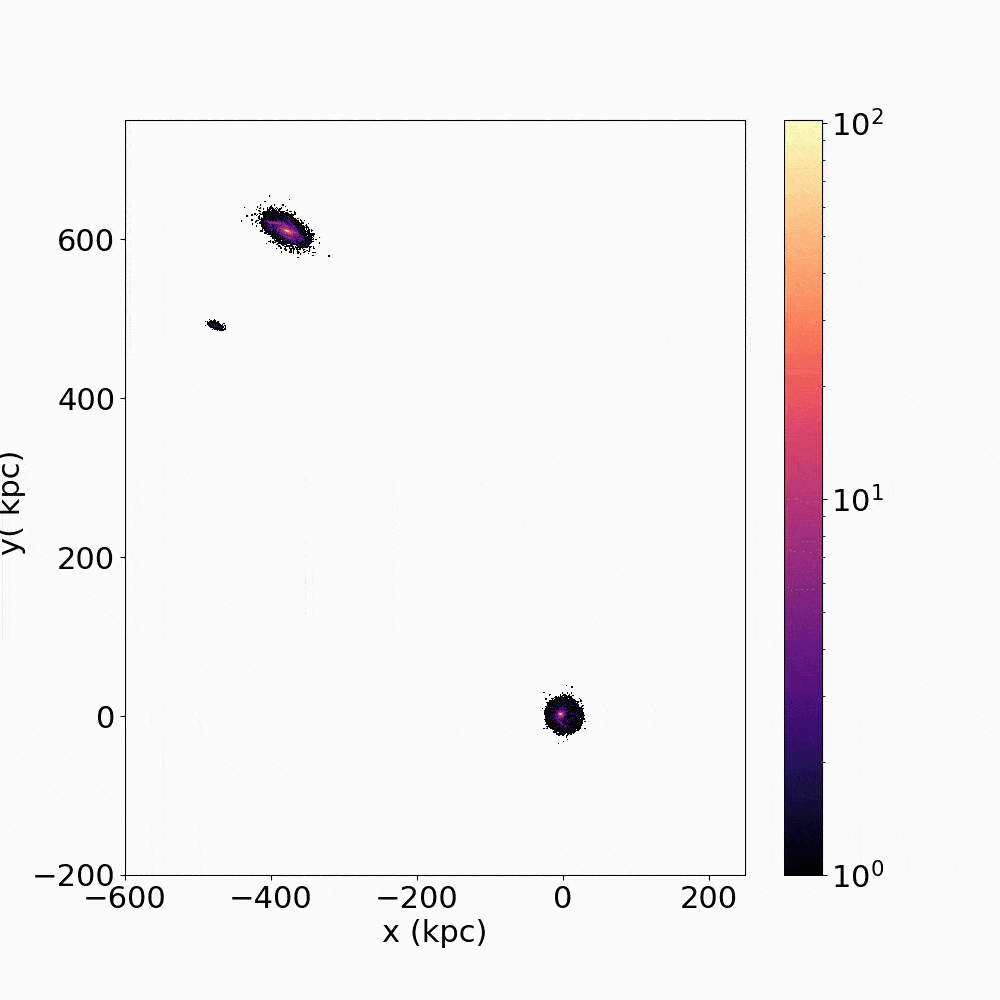

In [20]:
fig = Image(filename=('Optimized 2.gif'))
fig

# 2) Function to plot Local Group at given set of snapshots (centered on MW)

In [ ]:
# Define range of snapshots to use
snap_ids = np.arange(0,1,1)

for i, snap_id in enumerate(snap_ids):
        
    # Compose the data filename (be careful about the folder)
    # Add string of filenumber to value 000
    ilbl = '000' + str(snap_id)

    # Remove all but last 3 digits of string
    ilbl = ilbl[-3:]

    # Assign filename based on snapshot and galaxy inputs
    MW_file = 'C:/Users/Jimmy/Downloads/MW/MW_' + ilbl + '.txt'
    M31_file = 'C:/Users/Jimmy/Downloads/M31/M31_' + ilbl + '.txt'
    M33_file = 'C:/Users/Jimmy/Downloads/M33/M33_' + ilbl + '.txt'
    
    # Define CoM object for each galaxy
    COMD_MW = CenterOfMass(MW_file,2)
    COMD_M31 = CenterOfMass(M31_file,2)
    COMD_M33 = CenterOfMass(M33_file,2)
    
    # Find CoM components for position and velocity of the MW
    COMP_MW = COMD_MW.COM_P(0.1)
    COMV_MW = COMD_MW.COM_V(COMP_MW[0],COMP_MW[1],COMP_MW[2]) 
    
    # Center the MW in the images
    xD_MW = COMD_MW.x - COMP_MW[0].value
    yD_MW = COMD_MW.y - COMP_MW[1].value
    zD_MW = COMD_MW.z - COMP_MW[2].value

    # Define positions of M31 Disk Particles
    xD_M31 = COMD_M31.x - COMP_MW[0].value
    yD_M31 = COMD_M31.y - COMP_MW[1].value
    zD_M31 = COMD_M31.z - COMP_MW[2].value
    
    # Define distance of disk particles from center of M31
    #rd_M31 = np.sqrt(xD_M31**2+yD_M31**2+zD_M31**2)
    #print(rd_M31)
    
    # Define positions of M33 Disk Particles
    xD_M33 = COMD_M33.x - COMP_MW[0].value
    yD_M33 = COMD_M33.y - COMP_MW[1].value
    zD_M33 = COMD_M33.z - COMP_MW[2].value
    
    # Define distance of disk particles from center of M31
    #rd_M33 = np.sqrt(xD_M33**2+yD_M33**2+zD_M33**2)
    #print(rd_M33)
    
    # Define figure and axis object
    fig, ax= plt.subplots(figsize=(10, 10))

    # Plot galaxies as histogram of their disk particles (in x and y)
    plt.hist2d(xD_MW,yD_MW,bins=200,norm=LogNorm(),cmap='magma')
    plt.hist2d(xD_M31,yD_M31,bins=200,norm=LogNorm(),cmap='magma')
    plt.hist2d(xD_M33,yD_M33,bins=200,norm=LogNorm(),cmap='magma')

    # Plot colorbar of disk density
    plt.colorbar()
    
    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y( kpc) ', fontsize=22)
    
    # Set axis limits
    plt.xlim(-500,500)
    plt.ylim(-500,500)
    
    # Adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size
    
    # Save image to a file
    plt.savefig('C:/Users/Jimmy/Downloads/Simulation3/Simulation3_{0}.png'.format(ilbl), rasterized=True, dpi=100)

# Function to make 3D plots of merger (very slow)

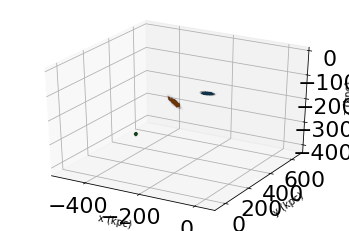

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.bar3d(xD_new,yD_new,zD_new,dx=0.01,dy=0.01,dz=0.01)
ax.bar3d(xD1_new,yD1_new,zD1_new,dx=0.01,dy=0.01,dz=0.01)
ax.bar3d(xD2_new,yD2_new,zD2_new,dx=0.01,dy=0.01,dz=0.01)
ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.set_zlabel("z (kpc)")
plt.show()